In [1]:
import rust_machine_learning
from syed_ml_lib import *
import os

In [2]:
# Setup the CNN
num_classifications = 10
input_height = 32
input_width = 32
input_depth = 3
CNN = rust_machine_learning.ConvolutionalNeuralNetwork(num_classifications, input_height, input_width, input_depth)

# Setup the optimizer
learning_rate = 1e-3
beta1 = 0.9
beta2 = 0.999
# CNN.set_optimizer_stochastic_gradient_descent(learning_rate)
# CNN.set_optimizer_momentum(learning_rate, beta1)
# CNN.set_optimizer_adagrad(learning_rate)
# CNN.set_optimizer_RMSProp(learning_rate, beta1)
CNN.set_optimizer_adam(learning_rate, beta1, beta2)

# Setup the layers
# The api has 3 functions
# add_convolutional_layer(filter_height, filter_width, num_filters)
# add_max_pool_layer()
# add_fully_connected_layer() 
# Add fully connected layer can only be called once, and must be called last

CNN.add_convolutional_layer(3, 3, 32)
# CNN.add_convolutional_layer(3, 3, 64)
CNN.add_max_pool_layer()
CNN.add_fully_connected_layer() 

image_directory = "../data/cifar-10/"
image_directory_path = os.path.abspath(image_directory)
CNN.set_image_loader(image_directory_path, input_height, input_width)

Reading images for classification "truck"
Reading images for classification "airplane"
Reading images for classification "cat"
Reading images for classification "deer"
Reading images for classification "dog"
Reading images for classification "ship"
Reading images for classification "bird"
Reading images for classification "automobile"
Reading images for classification "frog"
Reading images for classification "horse"


In [3]:
# Grab mnist data
import random
import numpy as np

df = pd.read_csv("../data/digit-recognizer/train.csv")

# Normalize images
df.iloc[:, 1:] = df.iloc[:, 1:].div(255.0).sub(0.5)
images = df.iloc[:, 1:].values.tolist()
df.iloc[:, 0] = df.iloc[:, 0].astype(np.float32)
labels = df.iloc[:, 0].values.tolist()

# Split into training and testing
test_images = images[0:20000]
test_labels = labels[0:20000]
train_images = images[20000:]
train_labels = labels[20000:]

df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
1,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
3,4.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
4,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
41996,1.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
41997,7.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
41998,6.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5


In [4]:
def test_mnist():
    num_batches_to_test = 500
    num_right = 0
    for i in range(num_batches_to_test):

        # Random sample one image from python list of images
        rand_index = random.randint(0, len(test_images) - 1)
        image = test_images[rand_index]
        label = test_labels[rand_index]

        prediction = CNN.classify([[image]])[0]
        if prediction == label:
            num_right += 1

    print("Accuracy: " + str(100.0 * num_right / (num_batches_to_test)))

In [5]:
test_image_loader = rust_machine_learning.ImageBatchLoader(image_directory_path, input_width, input_height)
def test_using_image_loader():
    num_batches_to_test = 100
    num_right = 0
    for i in range(num_batches_to_test):

        images, label = test_image_loader.batch_sample(1, True)

        prediction = CNN.classify(images)[0]
        if prediction == label[0]:
            num_right += 1

    print("Accuracy: " + str(100.0 * num_right / (num_batches_to_test)))

Reading images for classification "truck"
Reading images for classification "airplane"
Reading images for classification "cat"
Reading images for classification "deer"
Reading images for classification "dog"
Reading images for classification "ship"
Reading images for classification "bird"
Reading images for classification "automobile"
Reading images for classification "frog"
Reading images for classification "horse"


In [6]:
def train_using_raw_data():
    batch_size = 32
    num_iter = 500

    print("Accuracy before training:")
    test_mnist()
    print("Training...")
    for i in range(0, num_iter):

        # Create image and label batch from mnist
        image_batch, label_batch = [], []
        for j in range(batch_size):
            rand_index = random.randint(0, len(train_images) - 1)
            image = train_images[rand_index]
            label = train_labels[rand_index]
            image_batch.append([image])
            label_batch.append(label)

        # Train using MNIST dataset, select one image at a time randomly
        CNN.train_raw_data(image_batch, label_batch)

    print("Accuracy after training:")
    test_mnist()

    # Get the loss and accuracy and plot it
    perfomance_info = CNN.get_performance_info() # Return a list of tuple (accuracy, loss)
    graph_accuracy_loss(perfomance_info)

In [7]:
def train_using_set_img_loader():
    batch_size = 32
    num_iter = 5000
    print("Accuracy before training:")
    test_using_image_loader()
    print("Training...")

    # Split into increments of 50 because rust won't progress info print properly
    for i in range(0, num_iter, 50):
        CNN.train_using_image_loader(batch_size, 50)
    test_using_image_loader()

    # Get the loss and accuracy and plot it
    perfomance_info = CNN.get_performance_info() # Return a list of tuple (accuracy, loss)
    graph_accuracy_loss(perfomance_info)

In [8]:
# Now train the model
# train_using_raw_data()
train_using_set_img_loader()

Accuracy before training:
Accuracy: 4.0
Training...


thread '<unnamed>' panicked at tensor_lib/src/matrix.rs:765:5:
Cannot unflatten array, matrix dimensions incorrect!
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: Cannot unflatten array, matrix dimensions incorrect!

Label: frog 8.0
Prediction: truck (0.0)



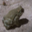

In [ ]:
# Interactive testing (for now animal only)
images, label = test_image_loader.batch_sample(1, True)

prediction = CNN.classify(images)
prediction = prediction[0]

# Assert animal image loader and CNN are in sync
assert(test_image_loader.get_classifications_map() == CNN.get_image_loader_classification_map())

# Now reverse mapping from string->float to float->string
classification_map = {}
for key, value in test_image_loader.get_classifications_map().items():
    classification_map[value] = key

print("Label: " + classification_map[label[0]] + " " + str(label[0]))
print("Prediction: " + classification_map[prediction] + " (" + str(prediction) + ")")
view_image((np.array(images[0]) +0.5), input_width, input_height, colorscale="")